In [1]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                            classification_report, roc_auc_score, 
                            roc_curve, precision_recall_curve)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, confusion_matrix, 
                            classification_report, roc_curve, precision_recall_curve)
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
data= pd.read_csv("C:/Users/shrey/OneDrive/Documents/SPRING 2025/pred/Loan_Data.csv")

## Converting string values to numeric

In [4]:
categorical_cols = ['gender', 'education', 'home_ownership', 'loan_intent', 'loan_default_history']
encoder = LabelEncoder()

# Encoding each categorical column
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

## defining features and target

In [6]:
features=data[["age", "gender", "education","income", "employment_experience", "home_ownership", "loan amount", "loan_intent", "loan_int_rate", "loan_percent_income", "credit_history_length", "credit_score", "loan_default_history"]]
target=data.loan_status

In [7]:
#Splitting the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

## Training the model

In [9]:
#As the features are continuous
classifier=GaussianNB()

In [10]:
model=classifier.fit(features, target)

## prediction

In [12]:
predictions1=model.predict(features)

In [13]:
# classifier=GaussianNB(priors=[0.5,0.5])
classifier=GaussianNB(priors=[1-target.mean(),target.mean()])
model=classifier.fit(features, target)

In [14]:
predictions2=model.predict(features)

In [15]:
for x in range(len(predictions2)):
    if predictions1[x]!=predictions2[x]:
        print("Different")

## Fitting and prediction

In [17]:
classifier=GaussianNB(priors=[0.5,0.5])
model=classifier.fit(features, target)

In [18]:
predictions3=model.predict(features)

## Predicting loan status on the basis of the data training

In [20]:
new_customer = [[30, 1, 2, 50000, 5, 1, 15000, 2, 13.5, 0.30, 6, 680, 0]]
new_customer_df = pd.DataFrame(new_customer, columns=features.columns)
loan_prediction = model.predict(new_customer_df)
print("Predicted Loan Status for the new customer:", "Approved" if loan_prediction[0] == 1 else "Not Approved")

Predicted Loan Status for the new customer: Approved


## Accuracy of the model

In [22]:
accuracy_NB = accuracy_score(target, predictions1)
print(f"Gaussian Naive Bayes Accuracy: {accuracy_NB:.2%}")

Gaussian Naive Bayes Accuracy: 81.84%


In [23]:
# Load YOUR dataset (replace with your path)
df = pd.read_csv('C:/Users/shrey/OneDrive/Documents/SPRING 2025/pred/Loan_Data.csv')

In [24]:
# 1. Define Features (X) and Target (y)
# 'loan_status' is the target
X = df.drop('loan_status', axis=1)  # Features
y = df['loan_status']               # Target

# 2. Check for missing values
print("Missing Values Before Cleaning:")
print(X.isnull().sum())

Missing Values Before Cleaning:
age                      0
gender                   0
education                0
income                   0
employment_experience    0
home_ownership           0
loan amount              0
loan_intent              0
loan_int_rate            0
loan_percent_income      0
credit_history_length    0
credit_score             0
loan_default_history     0
dtype: int64


In [25]:
categorical_cols = X.select_dtypes(exclude=np.number).columns
print(categorical_cols)

Index(['gender', 'education', 'home_ownership', 'loan_intent',
       'loan_default_history'],
      dtype='object')


In [26]:
# Categorical encoding
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

print(X.head())


   age  gender  education  income  employment_experience  home_ownership  \
0   22       0          4   71948                      0               3   
1   21       0          3   12282                      0               2   
2   25       0          3   12438                      3               0   
3   23       0          1   79753                      0               3   
4   24       1          4   66135                      1               3   

   loan amount  loan_intent  loan_int_rate  loan_percent_income  \
0        35000            4          16.02                 0.49   
1         1000            1          11.14                 0.08   
2         5500            3          12.87                 0.44   
3        35000            3          15.23                 0.44   
4        35000            3          14.27                 0.53   

   credit_history_length  credit_score  loan_default_history  
0                      3           561                     0  
1             

In [27]:
# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
# 4. Train Model
model = RandomForestClassifier(
        n_estimators=150,
        max_depth=6,
        class_weight='balanced',
        random_state=42
    )


In [29]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else [0] * len(y_test)
# Store results
result = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Confusion Matrix": confusion_matrix(y_test, y_pred),
    "Classification Report": classification_report(y_test, y_pred),
    "ROC AUC": roc_auc_score(y_test, y_proba) if hasattr(model, "predict_proba") else None
}

In [30]:
# 5. Print Results
print(f"Accuracy: {result['Accuracy']:.2f}")


Accuracy: 0.87


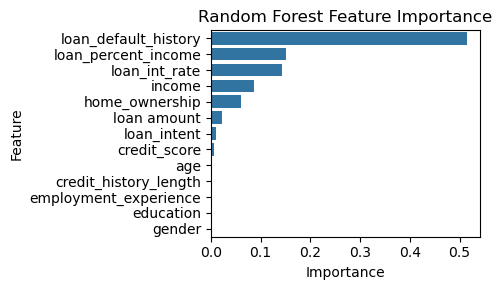

In [31]:
# Feature Importance (Random Forest)
plt.figure(figsize=(5, 3))
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Random Forest Feature Importance")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Random Forest Confusion Matrix')

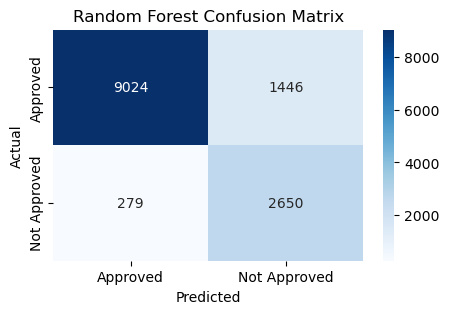

In [32]:
plt.figure(figsize=(5, 3))

# Confusion Matrix for Random Forest
sns.heatmap(result["Confusion Matrix"], annot=True, fmt='d', cmap='Blues', xticklabels=['Approved', 'Not Approved'], yticklabels=['Approved', 'Not Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix- Decision Tree')
plt.title("Random Forest Confusion Matrix")


In [33]:
# Calculate Feature Importance Percentages
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

# Convert to percentage
feature_importance['Importance_Percentage'] = (feature_importance['Importance'] / feature_importance['Importance'].sum()) * 100

# Display feature importance as percentages
print("\nFeature Importance Percentages:")
print(feature_importance[['Feature', 'Importance_Percentage']].to_string(index=False))

# Calculate Precision, Recall, F1
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Precision: {precision:.1%} (When we predict default, we're usually right)")
print(f"Recall: {recall:.1%} (We catch this percentage of actual defaults)")
print(f"F1 Score: {f1:.1%} (Balanced measure of precision and recall)")


Feature Importance Percentages:
              Feature  Importance_Percentage
 loan_default_history              51.512384
  loan_percent_income              15.119530
        loan_int_rate              14.383190
               income               8.743168
       home_ownership               6.060103
          loan amount               2.201664
          loan_intent               1.112677
         credit_score               0.573326
                  age               0.113163
credit_history_length               0.076384
employment_experience               0.075332
            education               0.022968
               gender               0.006111

Model Performance Metrics:
Precision: 64.7% (When we predict default, we're usually right)
Recall: 90.5% (We catch this percentage of actual defaults)
F1 Score: 75.4% (Balanced measure of precision and recall)


In [34]:
# Load YOUR dataset (replace with your path)
df1 = pd.read_csv('C:/Users/shrey/OneDrive/Documents/SPRING 2025/pred/Loan_Data.csv')

In [35]:
 df1 = df1.rename(columns={
 'ducation': 'education',
 'mployment_experience': 'employment_experience',
 'loan amount': 'loan_amount'
 })

In [36]:
 print(f"Dataset shape: {df1.shape}")
 print("\nFirst 5 rows:")
 1
print(df1.head())
 # Check for missing values
 print("\nMissing values:", df1.isnull().sum().sum())
 # Display target variable distribution
 print("\nLoan status distribution:")
 print(df1['loan_status'].value_counts())
 print(f"Percentage of defaults: {df1['loan_status'].mean() * 100:.2f}%")

Dataset shape: (44663, 14)

First 5 rows:
   age  gender    education  income  employment_experience home_ownership  \
0   22  female       Master   71948                      0           RENT   
1   21  female  High School   12282                      0            OWN   
2   25  female  High School   12438                      3       MORTGAGE   
3   23  female     Bachelor   79753                      0           RENT   
4   24    male       Master   66135                      1           RENT   

   loan_amount loan_intent  loan_int_rate  loan_percent_income  \
0        35000    PERSONAL          16.02                 0.49   
1         1000   EDUCATION          11.14                 0.08   
2         5500     MEDICAL          12.87                 0.44   
3        35000     MEDICAL          15.23                 0.44   
4        35000     MEDICAL          14.27                 0.53   

   credit_history_length  credit_score loan_default_history  loan_status  
0                      

In [37]:
# Data Preprocessing
# Separate features and target
X = df1.drop('loan_status', axis=1)
y = df1['loan_status']
# Identify categorical features
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
print("\nCategorical features:", list(cat_cols))
print("Numerical features:", list(num_cols))
# Encode categorical variables
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTraining set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")


Categorical features: ['gender', 'education', 'home_ownership', 'loan_intent', 'loan_default_history']
Numerical features: ['age', 'income', 'employment_experience', 'loan_amount', 'loan_int_rate', 'loan_percent_income', 'credit_history_length', 'credit_score']

Training set: (35730, 13)
Testing set: (8933, 13)


In [38]:
# Train Decision Tree model
print("\nTraining Decision Tree model...")
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate the model
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Training Decision Tree model...

Accuracy: 0.9121

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7000
           1       0.87      0.70      0.78      1933

    accuracy                           0.91      8933
   macro avg       0.89      0.84      0.86      8933
weighted avg       0.91      0.91      0.91      8933



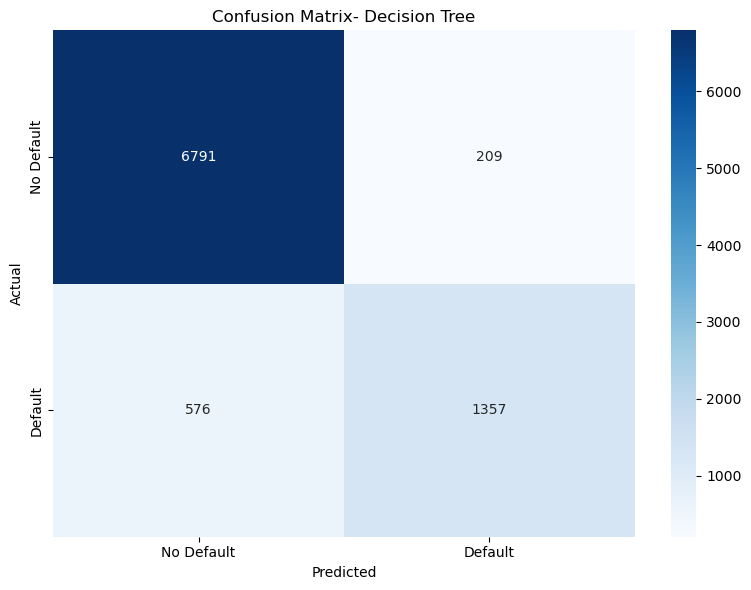

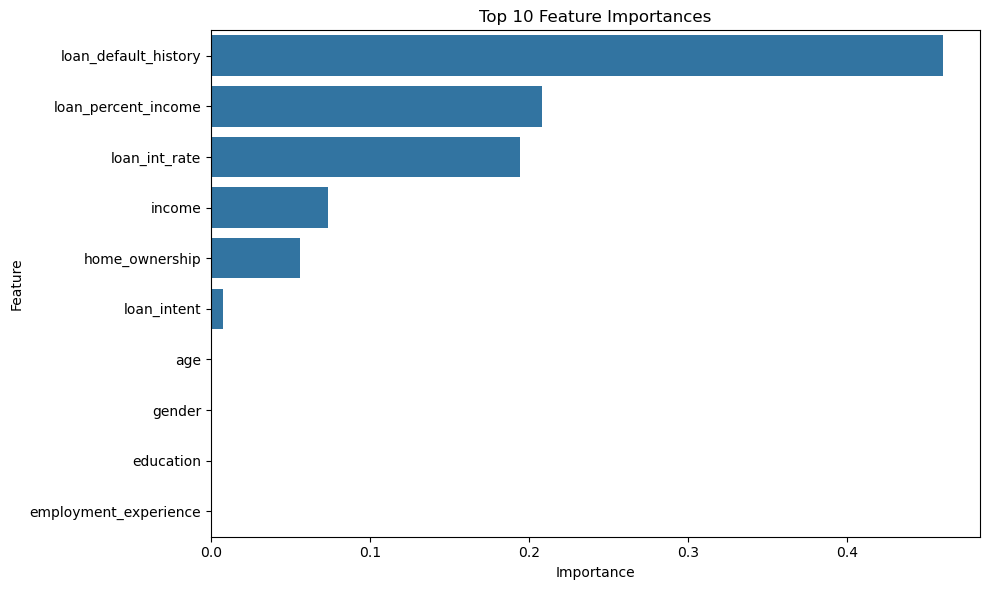

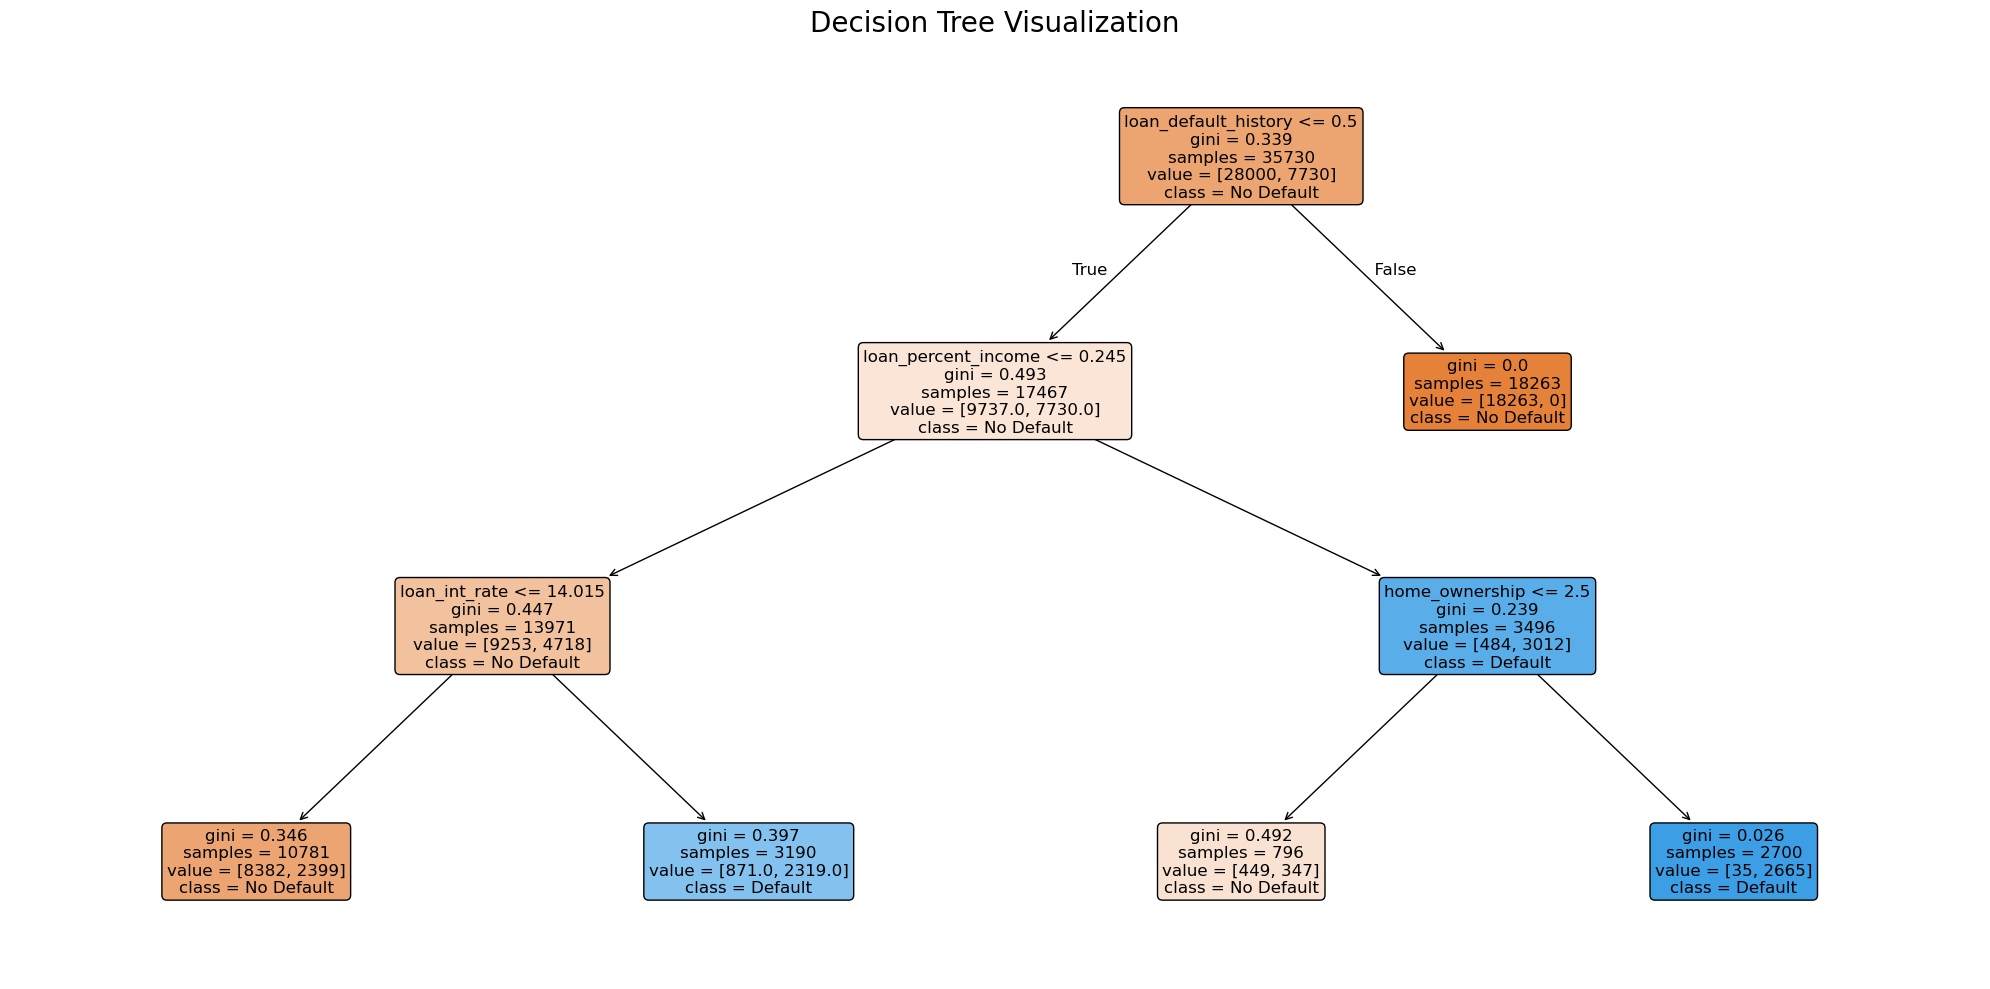


Decision Tree analysis completed!


In [42]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
xticklabels=['No Default', 'Default'],
yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix- Decision Tree')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()
# Calculate and visualize feature importance
feature_importance = pd.DataFrame({
'Feature': X.columns,
'Importance': dt_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance',ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()
# Visualize the decision tree (making sure it's clearly visible)
plt.figure(figsize=(20, 10))
# Create a simpler tree for visualization
dt_viz = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_viz.fit(X_train, y_train)
# Plot the tree
plot_tree(dt_viz,
filled=True,
feature_names=list(X.columns),
class_names=['No Default', 'Default'],
rounded=True,
fontsize=12)
plt.title('Decision Tree Visualization', fontsize=20)
plt.tight_layout()
plt.savefig('decision_tree_viz.png', dpi=300, bbox_inches='tight')
plt.show()
print("\nDecision Tree analysis completed!")